# Welcome to the Consumer Data Research Centre's workshop for the Festival of Social Science!

By working through this notebook and following along with the accompanying video, you can learn more about the type of work a data scientist might do, and start writing your very own code.

We’ll provide you with a large dataset of newspaper headlines from around the world, and you'll have the chance to discover examples of how the use of words differs between the United Kingdown and the United States. By following a typical data science project life-cycle, we’ll work through the process of gaining insights from data.


# What does this process look like?


When conducting data science we can broadly break this down into a few key areas;

 - Data Collection
 - Data Processing
 - Data Analysis
 - Data Visualisation and Dissemination

We already have the data so we’ll be focussing on the other steps today.


# About This Notebook

This interactive document you’re looking at is a called a Jupyter Notebook. Notebooks like this one are used a lot in universities and academia as a learning resource. 

Notebooks allow us to wrap up all the data, code and 'packages' (tools that can complete different tasks) in one place to make sharing our work easier so each person doesn’t have to individually download everything.

#### Important notice: As this is a remote document, if you are inactive for more than 10 minutes it may disconnect from the server.
#### If this happens, please close the page and re-enter through the link.


# Running the Code

All the code you need to use today is contained in the grey cells in this document. There are a few simple ways to make sure the code has worked:

 - To run a cell of code, you can select a cell by clicking on it, then click the “Run” button on the tool bar at the top of the page OR you can press the Ctrl and Enter keys together.
 - Once you have done this and the code has finished (this may take a few seconds depending on the task) the result will appear below the cell.

Try running the code below to see what happens. 

##### Remember if you click into the cell you can either press the "Run" button in the toolbar above (the play button!) or press the Ctrl and Enter keys together.


In [2]:
print("Hello World!")
print(17 + 6)

Hello World!
23


You should see that it has printed the phrase “Hello World!” and calculated a sum at the same time.

# What is Python?


Python is the name of the programming language we'll be using in this workshop. It is a very popular coding language used by researchers and businesses, and is an in-demand skill in the world of data science.

Don't worry about understanding every piece of code you see today, especially if it's your first time. Our goal is simply to give you an idea what a data scientist may be doing and how you might use code to analyse data. 

We will point you in the direction of more educational content at the end of this workshop but it would be useful to quickly introduce a few things at this stage:
 - Variables – Today we will be working with objects called variables. We can name variables ourselves to reflect what they area. They might be numbers, a string of text or even bits of our data which we will see later.
 - Comments (#) – every time you see a '#' in a cell of code this means it iss a comment that will not effect the result. These are notes we can leave for ourselves to remind us what is happening.

The cell below has an example of variables and comments. See if you can edit the code and see how the results change if you run the code again.


In [3]:
# Run this cell by pressing the run button or pressing Cntrl and Enter.
# This cell has examples of variable assignment
# (Notice how this line starts with '#' so it is a comment ignored by the code.)

# vvv Try editing this code!
my_name = "Waldo" 
breakfast_food = "eggs"
fav_number = 17
# ^^^ Try editing this code!

print("Hello! My name is " + my_name + ".")
print("Today I had " + breakfast_food + " for breakfast.")
print(str(fav_number) + " is my favourite number.")
print("Twice my favourite number would be: " + str(fav_number * 2))

Hello! My name is Waldo.
Today I had eggs for breakfast.
17 is my favourite number.
Twice my favourite number would be: 34


# Getting Setup

Next we'll start working with real data and get started with our analysis.

Before we can do that we first need to load the packages and libraries we will use. These packages and libraries contain different tools we are going to use on our data. 

This is an important to step to make sure the rest of our code works – but don't worry too much about this step.

In [4]:
# Importing useful Python modules

print("About to import Python modules...")
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
print("Finished importing Python modules")


About to import Python modules...
Finished importing Python modules


Next we’ll load in our data!

The data we are using today contains more than 150,000 entertaining news headlines collected in 2014. This data comes from a wider selection of 400,000 news headlines but for this exercise we have decided to focus on a single category. As a data scientist it is important to think about how the data we use may bias our results. Different newspapers have different target audiences and will use different words, for example the Daily Mail and the Financial Times.

In [5]:
# This code will load in our dataset.

# This is the name of the file, which is a csv file that has been compressed as a zip file.
data_file_name = "uci-news-aggregator-short.zip"

# Here we read file.
news_df = pd.read_csv(data_file_name)

# We're only going to look at titles and publishers of entertainment articles.
news_df = news_df[news_df['CATEGORY']=='e'].loc[:, ['TITLE','PUBLISHER']]

#Let us know when the task is finished
print("Finished reading the data.")

Finished reading the data.


The dataset is now stored in the variable named `news_df`. This variable contains an entire table of data!

Lets see what our data looks like:

In [6]:
# See what the table of data looks like:
print(news_df)

                                                    TITLE  \
2169       George Zimmerman Has an Armed Life on the Move   
2170    George Zimmerman Signs Autographs At Florida G...   
2171    George Zimmerman Signed Autographs at an Orlan...   
2172                 George Zimmerman back in controversy   
2173    George Zimmerman signs autographs at a Florida...   
...                                                   ...   
421035  LAPD Responds to Hollywood Restaurant After Ce...   
421036       Justin Bieber nearly crashes into pedestrian   
421037     Justin Bieber nearly crashes into an old woman   
421038  Justin Bieber has been warned by police not to...   
421039        Selena Gomez Shows Off New Weave, Sexy Maxi   

                              PUBLISHER  
2169                           WLTX.com  
2170                 Huffington Post UK  
2171    BlackNews.com \(press release\)  
2172                        WTXL ABC 27  
2173                              MSNBC  
...            

The dataset is too large, so the notebook won't show us everything. It shows us the first 5 and last 5 nows in our data and tells us that we have 151,792 rows in total.

Just from this quick look at the data, we see that this table has 3 columns:
- a numbered label (also called the **index**) for each row
- `TITLE`, containing the headline
- `PUBLISHER`, who the headline was printed by


# Examining Publishers

It would be useful to learn more about what is in our data. Let's look at how many different publishers there are in the `PUBLISHER` column.

In [7]:
# Look at the number of headlines per publisher in our dataset:

publisher_counts = news_df['PUBLISHER'].value_counts()
print(publisher_counts)

Contactmusic.com                       2306
Entertainmentwise                      1593
Daily Mail                             1455
TheCelebrityCafe.com                   1398
Examiner.com                           1393
                                       ... 
WVAH                                      1
Martins Ferry Times Leader \(blog\)       1
International Meetings Review             1
Varsity                                   1
ynaija                                    1
Name: PUBLISHER, Length: 6603, dtype: int64


Again, this table is too large to easily print everything, but at a glance we can see that the publisher with the most headlines in this dataset is Reuters, followed by Huffington Post and Businessweek.

`Length: 6603` also shows us there are 6603 publishers in this dataset.

We saved this table of publisher counts in the variable named `publisher_counts`, so we can use it in the next cell's code to see how many records appear with a given publisher. 

You can change the value of `publisher_to_check` to the name of any other news source you think might appear in this dataset. 

Have a go yourself, how many entertainment articles did your local newspaper print during this time?

(Note: Python often makes use of indented code. If you edit the code we've written below, do not alter the indents at the start of lines. If you do, the code might not work correctly.)

In [9]:
# Choose a publisher and ook at how many headlines in this dataset they produced.
# I have chosen a local newspaper to me, the Yorkshire Post

# vvv Try editing this code!
publisher_to_check = "Yorkshire Post"
# ^^^ Try editing this code!

if publisher_to_check in publisher_counts:
    print(publisher_counts[publisher_to_check])
else:
    print("That name doesn't appear in the list of publishers.")

15


This means that The Yorkshire Post published 15 entertainment headlines that have made it into our data.

# Examining Words in Headlines

Now let's look at the headlines. Let's say we're interested in looking at the set of words in a headline. Here's a convenient method for splitting up a string of text into a list of words, separating it on all its spaces:

In [10]:
# Splitting a string of text into separate words

example_sentence = "This example sentence contains six words."
example_word_list = example_sentence.split()
print(example_sentence)
print(example_word_list)

This example sentence contains six words.
['This', 'example', 'sentence', 'contains', 'six', 'words.']


We'll apply this to every headline in the `TITLE` column, and store all the results in a new column we'll call `WORDS`.

In [11]:
# Adding a new WORDS column to our table

news_df['WORDS'] = [headline.split() for headline in news_df['TITLE']]
print(news_df)

                                                    TITLE  \
2169       George Zimmerman Has an Armed Life on the Move   
2170    George Zimmerman Signs Autographs At Florida G...   
2171    George Zimmerman Signed Autographs at an Orlan...   
2172                 George Zimmerman back in controversy   
2173    George Zimmerman signs autographs at a Florida...   
...                                                   ...   
421035  LAPD Responds to Hollywood Restaurant After Ce...   
421036       Justin Bieber nearly crashes into pedestrian   
421037     Justin Bieber nearly crashes into an old woman   
421038  Justin Bieber has been warned by police not to...   
421039        Selena Gomez Shows Off New Weave, Sexy Maxi   

                              PUBLISHER  \
2169                           WLTX.com   
2170                 Huffington Post UK   
2171    BlackNews.com \(press release\)   
2172                        WTXL ABC 27   
2173                              MSNBC   
...      

Here's some code that will show us how many headlines contain a given word, and shows the first few examples:

In [16]:
# Counting the number of headlines with a chosen word

# vvv Try editing this code!
word_to_check = "Award"
# ^^^ Try editing this code!

news_words_df = news_df.explode("WORDS")
word_appearances = news_words_df.loc[news_words_df['WORDS']==word_to_check]
num_appearances = len(word_appearances)
print("Number of appearances of \"" + word_to_check + "\": " + str(num_appearances))
print("Examples of appearances (maximum 10):")
print(word_appearances.iloc[:10,[0,1]].to_string(index=False))

Number of appearances of "Award": 324
Examples of appearances (maximum 10):
                                                                          TITLE                           PUBLISHER
              Gerard Craft, Kevin Nashan James Beard Award Foundation Finalists           Riverfront Times \(blog\)
                      Familiar Local Names Dominate James Beard Award Finalists                          Chicagoist
                                     James Beard Award 2014 Finalists Announced                      The Daily Meal
     Cleveland chef Jonathon Sawyer named a finalist for 2014 James Beard Award                    The Plain Dealer
Paul Virant of Western Springs' Vie Restaurant named James Beard Award finalist                The Doings La Grange
                      Two St. Louis chefs named finalists for James Beard Award St. Louis Business Journal \(blog\)
          Dallas Chefs and Restaurants Shunned By James Beard Award Finals  ...                          D Magaz

In the code above, you can change the value of `word_to_check` to be any word you'd like to search for. Try it yourself!

# Normalising Words

After you've tried searching some words, go back and check how many times the word "Award" appears. Now try checking "award" in all lowercase instead -- you'll get a different output!

Currently, the code would treat the same word with a capital letter as different, but that's not really what we want. When we're checking how frequently a word is used, we want it to count every version.

Also, try checking "Sport," with a comma after it -- that's treated differently too. So we should rewrite our code to ignore punctuation and capital letters. 

That's what the code in the next cell does, saving the normalised words by overwriting the `WORDS` column.

In [18]:
# Removing all punctuation and converting all words to lowercase

nopunct_pattern = re.compile('[^a-zA-Z0-9 ]+')
news_df['WORDS'] = [set(nopunct_pattern.sub('', headline.lower()).split()) for headline in news_df['TITLE']]
print(news_df)

                                                    TITLE  \
2169       George Zimmerman Has an Armed Life on the Move   
2170    George Zimmerman Signs Autographs At Florida G...   
2171    George Zimmerman Signed Autographs at an Orlan...   
2172                 George Zimmerman back in controversy   
2173    George Zimmerman signs autographs at a Florida...   
...                                                   ...   
421035  LAPD Responds to Hollywood Restaurant After Ce...   
421036       Justin Bieber nearly crashes into pedestrian   
421037     Justin Bieber nearly crashes into an old woman   
421038  Justin Bieber has been warned by police not to...   
421039        Selena Gomez Shows Off New Weave, Sexy Maxi   

                              PUBLISHER  \
2169                           WLTX.com   
2170                 Huffington Post UK   
2171    BlackNews.com \(press release\)   
2172                        WTXL ABC 27   
2173                              MSNBC   
...      

Now when we search for words, the headlines with all possible capitalisations will be included. 

Try your searches again in this next cell of code. Again, feel free to change `word_to_check` to any word you'd like.

In [19]:
# Counting the number of headlines with a chosen word (now with normalised words)

# vvv Try editing this code!
word_to_check = "Award"
# ^^^ Try editing this code!

word_to_check = word_to_check.lower() # Force lowercase
news_words_df = news_df.explode("WORDS")
word_appearances = news_words_df.loc[news_words_df['WORDS']==word_to_check]
num_appearances = len(word_appearances)
print("Number of appearances of \"" + word_to_check + "\": " + str(num_appearances))
print("Examples of appearances (maximum 10):")
print(word_appearances.iloc[:10,[0,1]].to_string(index=False))

Number of appearances of "award": 485
Examples of appearances (maximum 10):
                                                                          TITLE                           PUBLISHER
  Business briefs: Halfacre Construction wins award for Manatee County building                    Bradenton Herald
              Gerard Craft, Kevin Nashan James Beard Award Foundation Finalists           Riverfront Times \(blog\)
                      Familiar Local Names Dominate James Beard Award Finalists                          Chicagoist
                                     James Beard Award 2014 Finalists Announced                      The Daily Meal
     Cleveland chef Jonathon Sawyer named a finalist for 2014 James Beard Award                    The Plain Dealer
                   The Barn at Blackberry Farm nominated for top culinary award             Knoxville News Sentinel
Paul Virant of Western Springs' Vie Restaurant named James Beard Award finalist                The Doings La Gra

# Exploring word frequency

Next, let's compare how frequently certain words appear in headlines from different news sources. First let's take a look through the 50 publishers with the most headlines in our dataset.

In [20]:
# View 50 most common publishers in the dataset
print(publisher_counts[:50])

Contactmusic.com                   2306
Entertainmentwise                  1593
Daily Mail                         1455
TheCelebrityCafe.com               1398
Examiner.com                       1393
PerezHilton.com                    1389
Wetpaint                           1287
Huffington Post                    1225
New York Daily News                1017
Los Angeles Times                  1001
Hollywood Life                      960
AceShowbiz                          852
The Hollywood Gossip                800
Hollywood Reporter                  796
Fashion Times                       788
The Inquisitr                       785
Broadway World                      754
Just Jared                          752
Us Magazine                         711
International Business Times AU     705
Reality TV World                    692
Belfast Telegraph                   674
Irish Independent                   663
First Coast News                    659
Vulture                             613


From this list, we'll choose a few from the UK and from the US so we can start to look at how the language used differs.

We'll ask you to come back to the section later on so you can make you're own data visualisations and see how the results change.


In [27]:
# Pick a list of UK and US publishers. Make sure to write them exactly as they appear in the list above.

# vvv Try editing this code!
uk_publisher_list = ["Daily Mail", "Mirror.co.uk", "Digital Spy UK"]
us_publisher_list = ["Los Angeles Times", "USA TODAY", "CBS Local"]
# ^^^ Try editing this code!

print(publisher_counts[uk_publisher_list])
print("Total for these publishers:")
print(sum(publisher_counts[uk_publisher_list]))
print()
print(publisher_counts[us_publisher_list])
print("Total for these publishers:")
print(sum(publisher_counts[us_publisher_list]))

Daily Mail        1455
Mirror.co.uk       513
Digital Spy UK     463
Name: PUBLISHER, dtype: int64
Total for these publishers:
2431

Los Angeles Times    1001
USA TODAY             513
CBS Local             417
Name: PUBLISHER, dtype: int64
Total for these publishers:
1931


Above we see the number of articles each of the chosen publications released during this time.

It can be important to remember that not every word in every headline might be interesting! We really want to find out if the publications in the UK and US are talking about different things or not.

For example let's compare how many times the word "the" appears in these sources. You can also try replacing "the" with any other word you'd like to check.

In [28]:
# Counting instances of a certain word in headlines from selected publishers

# vvv Try editing this code!
word_to_check = "the"
# ^^^ Try editing this code!

word_to_check = word_to_check.lower() # Force lowercase
news_words_df = news_df.explode("WORDS")
word_appearances = news_words_df.loc[news_words_df['WORDS']==word_to_check].drop(['WORDS'], axis=1)

word_appearances_uk = word_appearances[word_appearances["PUBLISHER"].isin(uk_publisher_list)]
word_appearances_us = word_appearances[word_appearances["PUBLISHER"].isin(us_publisher_list)]

total_uk_count = len(news_df[news_df["PUBLISHER"].isin(uk_publisher_list)])
total_us_count = len(news_df[news_df["PUBLISHER"].isin(us_publisher_list)])

print("Number of UK headlines with \"" + word_to_check + "\": " + str(len(word_appearances_uk)) )
print("Total UK headlines: " + str(total_uk_count))
print("Proportion: " + str(len(word_appearances_uk)/total_uk_count))
print()
print("Number of US headlines with \"" + word_to_check + "\": " + str(len(word_appearances_us)) )
print("Total US headlines: " + str(total_us_count))
print("Proportion: " + str(len(word_appearances_us)/total_us_count))
print()
print(word_appearances_uk)
print(word_appearances_us)


Number of UK headlines with "the": 560
Total UK headlines: 2431
Proportion: 0.23035787741670094

Number of US headlines with "the": 335
Total US headlines: 1931
Proportion: 0.17348524080787156

                                                    TITLE       PUBLISHER
2264    5 essential observations from Secrets, the new...    Mirror.co.uk
2722    Bachelor star Juan Pablo Galavis blames poor E...      Daily Mail
3122    True Detective episode 3 recap: 'The Locked Room'  Digital Spy UK
3199    Lena Dunham and Jack Antonoff pictured on 'dou...      Daily Mail
3215    Watch Lena Dunham join the Scandal team in a h...    Mirror.co.uk
...                                                   ...             ...
419863  The Sopranos creator David Chase denies 'Tony ...  Digital Spy UK
419914  The Sopranos' David Chase finally confirms: 'T...  Digital Spy UK
420051  Emma Stone dazzles in plunging emerald green g...      Daily Mail
420141  Emma Stone flashes midriff at Birdman photocal...      Dai

Of course the word 'the' is used all time and newspapers are no different.

Next, let's try to find which words appear in the most UK headlines and US headlines. You can change the value of the `top_words_number` to choose how many words you'd like to display, instead of only the top ten.

In [29]:
# Most common words in headlines from our selected publishers

# vvv Try editing this code!
top_words_number = 10
# ^^^ Try editing this code!

uk_words_df = news_words_df[news_words_df["PUBLISHER"].isin(uk_publisher_list)]
uk_word_counts = uk_words_df['WORDS'].value_counts()
print(str(top_words_number) + " most common words from selected UK publishers:")
print(uk_word_counts[:top_words_number])
print()
us_words_df = news_words_df[news_words_df["PUBLISHER"].isin(us_publisher_list)]
us_word_counts = us_words_df['WORDS'].value_counts()
print(str(top_words_number) + " most common words from selected US publishers:")
print(us_word_counts[:top_words_number])


10 most common words from selected UK publishers:
in      589
the     560
to      529
and     512
of      431
as      344
for     317
a       305
on      276
with    275
Name: WORDS, dtype: int64

10 most common words from selected US publishers:
the     335
to      318
of      314
in      297
for     207
on      198
and     192
at      177
a       177
with    145
Name: WORDS, dtype: int64


Many of these words aren't very interesting: to, the, in, of, and so on. 

Let's consult a list of these common words (also called "stop words"), and ignore anything on that list when counting the most frequent words in the headlines, then we can focus on the interesting parts.

In [30]:
# Most common words in headlines from our selected publishers, ignoring stop words

# vvv Try editing this code!
top_words_number = 10
# ^^^ Try editing this code!

stopwords_list = [nopunct_pattern.sub('', sw.lower()) for sw in STOPWORDS]
uk_goodwords_df = uk_words_df[~uk_words_df['WORDS'].isin(stopwords_list)]
uk_goodword_counts = uk_goodwords_df['WORDS'].value_counts()
us_goodwords_df = us_words_df[~us_words_df['WORDS'].isin(stopwords_list)]
us_goodword_counts = us_goodwords_df['WORDS'].value_counts()

print(str(top_words_number) + " most common words from selected UK publishers:")
print(uk_goodword_counts[:top_words_number])
print()
print(str(top_words_number) + " most common words from selected US publishers:")
print(us_goodword_counts[:top_words_number])


10 most common words from selected UK publishers:
kardashian    230
kim           212
new           182
star          106
kanye          91
wedding        81
cyrus          77
watch          77
miley          77
reveals        74
Name: WORDS, dtype: int64

10 most common words from selected US publishers:
new          98
dies         59
show         56
2014         55
video        54
game         54
thrones      46
recap        46
coachella    45
music        41
Name: WORDS, dtype: int64


That's much better and and shows more interesting insights into the difference in the language used between these publications.

From these publications we find that the UK headlines love talking about Kim Kardashian. As we move down the list we can see more celebrity news popping up. Whereas the US headlines are not dominated by individual celebraties, they appear to have a slightly broader focus with specific things like Game of Thornes and the Coachella music festival featuring.

You'll have a chance to see how these words change when you chose your own publications, but for now it would be useful to make some visualisations and look at the results.

# Bar Charts

We can create bar charts showing some of the most common words in a group of publishers. Again, you can choose how many words we display in our chart by changing the value of the `top_words_number` variable.

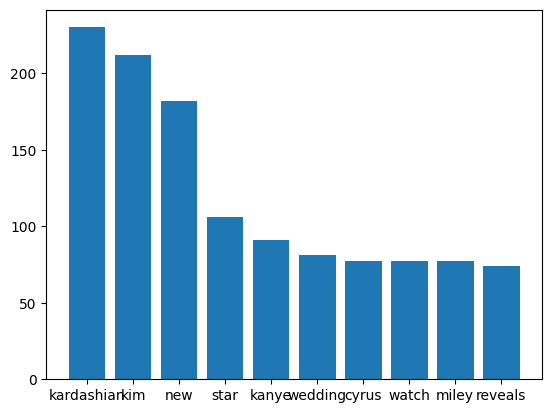

In [36]:
# Bar chart of UK data

# This value is the number of most frequent words we'll include in our chart:
# vvv Try editing this code!
top_words_number = 10
# ^^^ Try editing this code!

word_counts_to_graph = uk_goodword_counts

top_words_data = word_counts_to_graph[:top_words_number]
fig, ax = plt.subplots()
ax.bar(top_words_data.index, top_words_data.values)
plt.show()


The word labels run too closely together along the bottom of that chart, so let's try a horizontal bar chart instead.

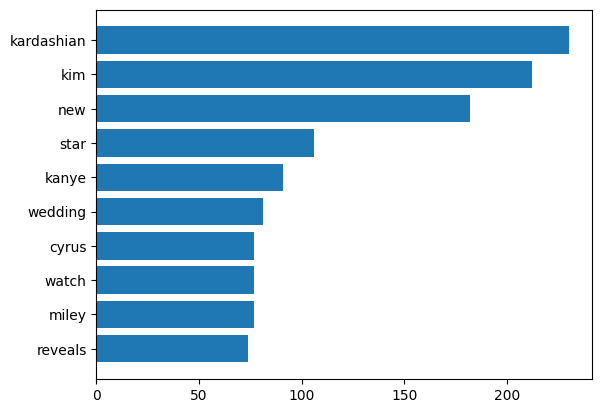

In [37]:
# Horizontal bar chart

# This value is the number of most frequent words we'll include in our chart:
# vvv Try editing this code!
top_words_number = 10
# ^^^ Try editing this code!

word_counts_to_graph = uk_goodword_counts
top_words_data = word_counts_to_graph[:top_words_number]
fig, ax = plt.subplots()
ax.barh(top_words_data.index[::-1], top_words_data.values[::-1])
plt.show()


There are several extra features that we can add to charts like this. Let's add a title for the chart, change the colour of the bars from the default blue, and add display the size of each bar as a label on the bar itself.

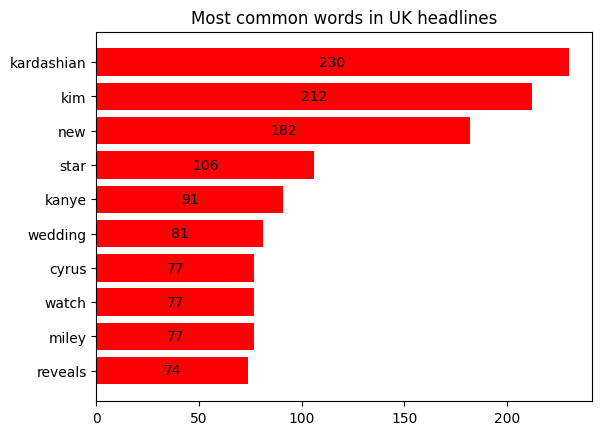

In [38]:
# Adding extra features

# vvv Try editing this code!

# This value is the number of most frequent words we'll include in our chart:
top_words_number = 10
# This value is the colour of the bars:
bar_colour = "red"
# This value will be the title that appears at the top:
chart_title = "Most common words in UK headlines"

# ^^^ Try editing this code!


word_counts_to_graph = uk_goodword_counts

top_words_data = word_counts_to_graph[:top_words_number]
fig, ax = plt.subplots()
bars = ax.barh(top_words_data.index[::-1], top_words_data.values[::-1], color=bar_colour)
ax.bar_label(bars, label_type='center')
ax.set_title(chart_title)
plt.show()


# Word Clouds

We can also make word clouds that show the most common words in our data.

Word clouds are creating with an element of randomness, so you can run the code multiple times to generate a slightly different-looking word cloud each time.

The words that appear here will change if you experiment by changing the publishers used earlier on - we can can also change the appearence of the word cloud - give it a go!

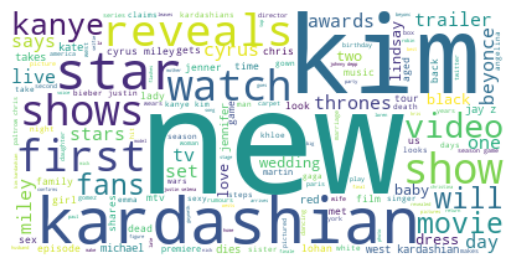

In [39]:
# Word cloud for UK headlines

#Try changing the colour here to see how the visualation changes
bg_colour = "white"

text_for_cloud = " ".join(uk_goodwords_df['WORDS'].tolist())
wcloud = WordCloud(background_color=bg_colour, normalize_plurals=False).generate(text_for_cloud)
plt.figure()
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

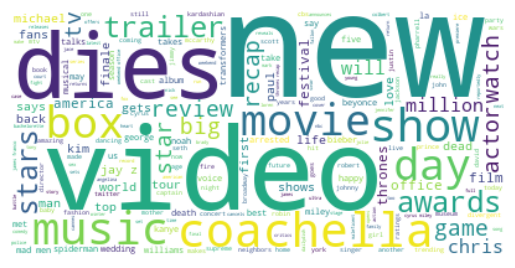

In [35]:
# Word cloud for US headlines

#Try changing the colour here to see how the visualation changes
bg_colour = "white"

text_for_cloud = " ".join(us_goodwords_df['WORDS'].tolist())
wcloud = WordCloud(background_color=bg_colour, normalize_plurals=False).generate(text_for_cloud)
plt.figure()
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exploring Word Differences

The word clouds we just generated give us the impression that UK and US news publishers generally use different words in their headlines. This may be due to differences in topics covered, or differences in the language they use.

Let's try to find the words that are used more by one set of publishers than the other. There are many options for how we could measure this. Let's use the simple method of counting the number of times one set of publishers uses a word, minus the number of times the other set uses it.

In [40]:
# Finding words used more by one set of publishers vs the other

# Getting list of words that appear in these sets' headlines, without stop words
full_word_list = sorted(set(uk_goodword_counts.index) | set(us_goodword_counts.index))

# Creating data frame that compares word counts
full_uk_counts = [uk_goodword_counts[w] if w in uk_goodword_counts else 0 for w in full_word_list]
full_us_counts = [us_goodword_counts[w] if w in us_goodword_counts else 0 for w in full_word_list]
uk_vs_us_counts = pd.DataFrame({"WORD":full_word_list, 
                    "UK_COUNT":full_uk_counts, 
                    "US_COUNT":full_us_counts, 
                    "UK_VS_US_DIFF":[a-b for a,b in zip(full_uk_counts, full_us_counts)]})
# Sorting data frame by difference in count
uk_vs_us_counts.sort_values(by="UK_VS_US_DIFF", ascending=False, inplace=True)
print(uk_vs_us_counts[:10])
print()
print(uk_vs_us_counts[-10:])

            WORD  UK_COUNT  US_COUNT  UK_VS_US_DIFF
4150  kardashian       230        19            211
4223         kim       212        29            183
5181         new       182        98             84
4147       kanye        91        19             72
7168        star       106        35             71
6281     reveals        74        10             64
2033       cyrus        77        26             51
2923       first        70        20             50
4900       miley        77        27             50
8176        west        65        17             48

           WORD  UK_COUNT  US_COUNT  UK_VS_US_DIFF
6068    ratings         3        17            -14
7752   trending         0        15            -15
8156    weekend         8        24            -16
296       actor        20        36            -16
6288     review        14        33            -19
4908    million         9        30            -21
2241       dies        37        59            -22
6524        say    

The above code lets us view the top 10 words that appear more from one publisher set than the other. The final collumn in the tables above shows us the differences in the number of times a word appears.

The counts above prove what we found earlier for these publications. These UK headlines were dominated by celebrities where was this wasn't the case in the US.

Do you know what kind of words would appear in these headlines? Have a try for yourself, see if you can find surprising words that appear in headlines. These could be specific actors or tv shows, maybe even words you think that might be used in one country but not the other? 

We've had a go with one word below - have a go yourself and share your interesting results with us.

In [45]:
# You can search for one word at a time like we have here, if you want to add more words you can.
# If you want to search multiple words simply change the line below to end ["telly","new word here"] - try it
# vvv Try editing this code!
list_of_words_to_check = ["telly"]
# ^^^ Try editing this code!

for word_to_check in list_of_words_to_check:
    word_to_check = word_to_check.lower() # Force lowercase
    news_words_df = news_df.explode("WORDS")
    word_appearances = news_words_df.loc[news_words_df['WORDS']==word_to_check].drop(['WORDS'], axis=1)
    print(word_to_check + " results: " + str(word_appearances.shape[0]))
    if word_appearances.shape[0] > 0:
        print(word_appearances)
        print()


telly results: 1
                                                    TITLE     PUBLISHER
396183  On the telly: Watch Jenny Lewis perform 'Just ...  DIY Magazine



# Now it's your turn

You've seen how we've found some interesting results from our chosen publications. 

Now we want you to go back up this notebook to the point we explore word frequenecy (about half way through!) and choose some publications of your own. You can change the box above to show you more than 50 publicactions if you need more options.

Once you've done that run every box of code again and see how different your bar charts, word clouds, and results a

## Summary

Today you've had a chance to see what a data scientist may be doing on a day to day basis.

You've worked with real life data in our interactive coding environment and have hands on experience using the Python programming language.

You've gained experience of data processing, analysis and visualation and had the opportunity to write code for youself.

Programming languages can be hard to understand if you're seeing them for the first time. If you didn't understand some of the code you've seen today don't worry - learning these skills takes practice.

If you're interested in learning more about data science, the work we do at the Consumer Data Research Centre or continuing your data science journey and honing your skills we have a range of information and tutorials www.cdrc.ac.uk or get in touch with us on twitter @CDRC_UK to find out more about what we do.

Don't forget to share your insights with using #CDRCSayData